In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

from lightgbm import LGBMClassifier

In [2]:
# Load a dataset into a Pandas Dataframe
train_df = pd.read_csv('./spaceship-titanic/Kaggle_Competition_Data/train.csv')
test_df = pd.read_csv('./spaceship-titanic/Kaggle_Competition_Data/test.csv')
print("Full train dataset shape is {}".format(train_df.shape))
print("Full test dataset shape is {}".format(test_df.shape))

Full train dataset shape is (8693, 14)
Full test dataset shape is (4277, 13)


In [3]:
# Display the first 5 examples
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [4]:
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [5]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [6]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.00,4195.00,4171.00,4179.00,4176.00,4197.00
mean,28.66,219.27,439.48,177.30,303.05,310.71
std,14.18,607.01,1527.66,560.82,1117.19,1246.99
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,26.00,0.00,0.00,0.00,0.00,0.00
75%,37.00,53.00,78.00,33.00,50.00,36.00
max,79.00,11567.00,25273.00,8292.00,19844.00,22272.00


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


<Axes: >

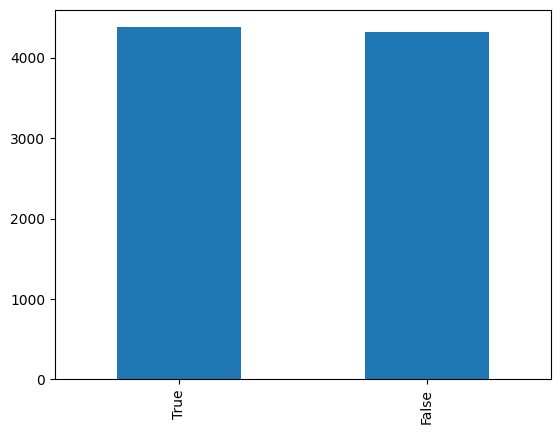

In [9]:
plot_df = train_df.Transported.value_counts()
plot_df.plot(kind="bar")

In [10]:
# fig, ax = plt.subplots(5,1,  figsize=(10, 10))
# plt.subplots_adjust(top = 2)

# sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0])
# sns.histplot(dataset_df['FoodCourt'], color='b', bins=50, ax=ax[1])
# sns.histplot(dataset_df['ShoppingMall'], color='b', bins=50, ax=ax[2])
# sns.histplot(dataset_df['Spa'], color='b', bins=50, ax=ax[3])
# sns.histplot(dataset_df['VRDeck'], color='b', bins=50, ax=ax[4])

In [11]:
# check for null values
train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [12]:
# check for null values
test_df.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [13]:
print("Train unique values: \n",train_df.nunique() )

Train unique values: 
 PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


In [14]:
print("test unique values: \n",test_df.nunique() )

test unique values: 
 PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64


In [15]:
print("Train distinct values: \n",train_df['HomePlanet'].unique())

Train distinct values: 
 ['Europa' 'Earth' 'Mars' nan]


In [16]:
print("test distinct values: \n",test_df['HomePlanet'].unique())

test distinct values: 
 ['Earth' 'Europa' 'Mars' nan]


In [17]:
# List of unique values 'Destination'
print("Train distinct values: \n",train_df['Destination'].unique())

Train distinct values: 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [18]:
# List of unique values 'Destination'
print("test distinct values: \n",test_df['Destination'].unique())

test distinct values: 
 ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]


In [19]:
# Check for duplicate Ids
# Train
idsUnique = len(set(train_df.PassengerId))
idsTotal = train_df.shape[0]
idsDupli = idsTotal - idsUnique
print("Train: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

Train: There are 0 duplicate IDs for 8693 total entries


In [20]:
 # we drop PassengerId and Name as they dont provide any valuable meaning to training data 
train = train_df.drop(['PassengerId', 'Name'], axis=1)
train.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,True


In [21]:
# Test
idsUnique = len(set(test_df.PassengerId))
idsTotal = test_df.shape[0]
idsDupli = idsTotal - idsUnique
print("Test: There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

Test: There are 0 duplicate IDs for 4277 total entries


In [22]:
 # we drop PassengerId and Name as they dont provide any valuable meaning to training data 
test = test_df.drop(['PassengerId', 'Name'], axis=1)
test.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00
1,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00
2,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00
3,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00
4,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00


In [23]:
# Check for missing values
# Train
train_missing_val_count = (train.isnull().sum())
# Test
test_missing_val_count = (test.isnull().sum())
print("Train missing values: \n",train_missing_val_count[train_missing_val_count>0],"\n\n","Test missing values: \n",  test_missing_val_count[test_missing_val_count>0])

Train missing values: 
 HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64 

 Test missing values: 
 HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64


In [24]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median" )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)

In [25]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(train,test ,label_cols)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int32  
 2   Cabin         8693 non-null   int32  
 3   Destination   8693 non-null   int32  
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int32  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int32(5)
memory usage: 585.9 KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int32  
 1   CryoSleep     4277 non-null   int32  
 2   Cabin         4277 non-null   int32  
 3   Destination   4277 non-null   int32  
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int32  
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
dtypes: float64(6), int32(5)
memory usage: 284.1 KB


In [28]:
train.drop(["Cabin"] , axis = 1 ,inplace = True)
test.drop(["Cabin"] , axis = 1 ,inplace = True)
X = train.drop("Transported" , axis =1 )
y = train["Transported"]
X_train , X_test , y_train , y_test = train_test_split(X , 
                                                       y, 
                                                       random_state = 0,
                                                       test_size =0.25)

In [29]:
# clf = LazyClassifier(verbose=0,
#                      ignore_warnings=True,
#                      custom_metric=None,
#                      predictions=False,
#                      random_state=0,
#                      classifiers='all')

# models, predictions = clf.fit(X_train , X_test , y_train , y_test)

In [30]:
# models[:15]

In [31]:
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 12


In [32]:
xgb = XGBClassifier(booster='gbtree', tree_method='gpu_hist', gpu_id=0,nthread=6)
param_grid = {
     'max_depth': [6,7,8,9,10,12],
    'n_estimators': [200, 300,400],
    'learning_rate': [0.01, 0.05,0.02,0.03],
}

scoring = ['f1']
# Set up the k-fold cross-validation
        
grid_search = GridSearchCV(estimator=xgb, 
                   param_grid=param_grid, 
                   scoring=scoring, 
                   refit='f1', 
                   n_jobs=6, 
                   cv=3, 
                   verbose=3,
                          )
# Fit grid search
grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [33]:
print("best params", grid_search.best_params_)
y_pred = final_model.predict(X_test)

best params {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 300}


In [34]:
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1 = round(f1_score(y_test, y_pred, average = 'macro'), 3)
print('-- Accuracy: {} / Precision: {} / Recall: {} / f1: {}'.format(accuracy,precision,recall,f1))

-- Accuracy: 0.793 / Precision: 0.767 / Recall: 0.845 / f1: 0.792


In [35]:

y_hat = final_model.predict(test)
submission = pd.DataFrame(test_df['PassengerId'])
submission['Transported'] = y_hat
submission['Transported'] = submission['Transported'].replace({1: True, 0: False})
len(submission[submission['Transported'] == True])

2363

In [36]:
submission.to_csv('submission1.csv', index=False)
